In [84]:
import pandas as pd # load and manipulate data and for One-Hot Encoding
import numpy as np # calculate the mean and standard deviation
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from statsmodels.graphics.tsaplots import plot_acf

In [85]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11,4)})

In [86]:
# Load data
df = pd.read_csv(
    'full_data.v1.csv')
df.sample(5)

,trip,obs,country,city,mode,mode2,route,wo,ac,crowd,co2,lnco2,over,season
399,26,15,1,2,0,1,6,2,1,3,1734,7.458186,1,NaN
6546,338,22,1,1,0,0,0,0,0,0,443,6.093570,0,NaN
5579,250,20,1,2,1,2,1,1,2,3,1044,6.950815,1,NaN
1622,107,6,0,0,1,2,0,1,2,3,695,6.543912,0,Winter
5925,290,2,1,1,2,3,2,2,2,2,646,6.470800,0,NaN


In [87]:
df1 = df.copy()

In [88]:
df1.rename(columns={'crowd':'Crowdedness'})

,trip,obs,country,city,mode,mode2,route,wo,ac,Crowdedness,co2,lnco2,over,season
0,1,1,0,0,2,3,0,1,2,1,553,6.315358,0,Spring
1,1,2,0,0,2,3,0,1,2,1,566,6.338594,0,Spring
2,1,3,0,0,2,3,0,1,2,1,552,6.313548,0,Spring
3,1,4,0,0,2,3,0,1,2,1,551,6.311735,0,Spring
4,1,5,0,0,2,3,0,1,2,1,596,6.390241,0,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,347,46,1,2,0,0,0,0,0,0,455,6.120297,0,NaN
7021,347,47,1,2,0,0,0,0,0,0,437,6.079933,0,NaN
7022,347,48,1,2,0,0,0,0,0,0,434,6.073045,0,NaN
7023,347,49,1,2,0,0,0,0,0,0,438,6.082219,0,NaN


In [89]:
df1['mode2'] = np.where(df1['mode2'] == 0, 'Outdoors',
                   np.where(df1['mode2'] == 1, 'BRT',
                   np.where(df1['mode2'] == 2, 'Bus','Subway')))

In [90]:
df1 = df1[df1['mode2'] != 'Outdoors']
df1.sample(5)

,trip,obs,country,city,mode,mode2,route,wo,ac,crowd,co2,lnco2,over,season
1791,119,8,0,0,1,Bus,0,2,1,3,871,6.769642,0,Autumn
3447,188,3,1,2,3,Bus,5,2,1,3,1065,6.970730,1,NaN
5055,215,83,1,1,0,BRT,9,2,1,1,875,6.774224,0,NaN
408,26,24,1,2,0,BRT,6,2,1,3,1323,7.187657,1,NaN
5009,215,37,1,1,0,BRT,9,2,1,2,1048,6.954639,1,NaN


In [91]:
df1['crowd'] = np.where(df1['crowd'] == 1, 'Not crowded',
                   np.where(df1['crowd'] == 2, 'Semi-crowded','Crowded'))

In [92]:
df1['city'] = np.where(df1['city'] == 0, 'Montreal',
                   np.where(df1['city'] == 1, 'Mexico City', 'Puebla'))

In [93]:
df1['route'] = np.where(df1['route'] == 0, 'Metro Green (Montreal)',
                   np.where(df1['route'] == 1, 'Metro Blue (Montreal)',
                   np.where(df1['route'] == 2, 'Metro Orange (Montreal)',
                   np.where(df1['route'] == 3, 'Bus 136 (Montreal)',
                   np.where(df1['route'] == 4, 'Bus 141 (Montreal)',
                   np.where(df1['route'] == 5, 'BRT - L1 (Puebla) ',
                   np.where(df1['route'] == 6, 'BRT - L3 (Puebla)',
                   np.where(df1['route'] == 7, 'BRT - Metrobus L1 (Mexico)',
                   np.where(df1['route'] == 8, 'BRT - Metrobus L2 (Mexico)',
                   np.where(df1['route'] == 9, 'BRT - Metrobus L5 (Mexico)','Other'))))))))))

In [94]:
df1['wo'] = np.where(df1['wo'] == 1, 'Windows closed', 'Windows opened')

In [95]:
df1['ac'] = np.where(df1['ac'] == 1, 'AC/Heating off', 'AC/Heating on')

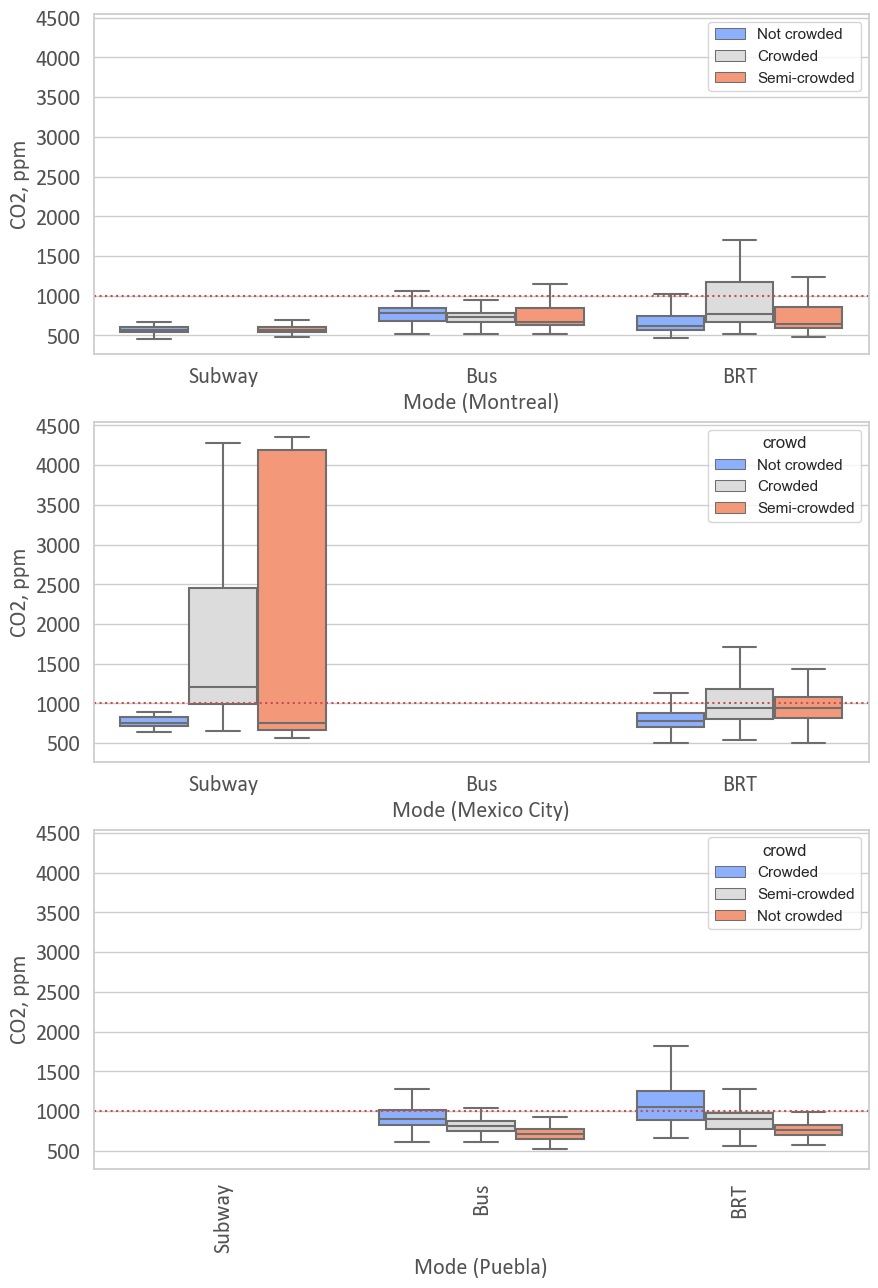

In [101]:
bp = sns.set(style='whitegrid')
facecolor = 'white'
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 15), facecolor=facecolor, sharey=True)

order = df1.groupby('mode2')['co2'].median().sort_values().index

g=sns.boxplot(x='mode2', y='co2', data=df1[(df1.city=='Montreal')], hue='crowd', showfliers=False, #showfliers turns on and off the outliers ticks
           #medianprops={"color":"coral"},
           palette='coolwarm',
           order=order,
           saturation=5,
           ax=ax1,
           )
font_color = '#525252'
csfont = {'fontname':'Calibri'}
hfont = {'fontname':'Calibri'}

ax1.set_ylabel('CO2, ppm', fontsize=16, color=font_color, **hfont)
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
    
ax1.set_xlabel('Mode (Montreal)', fontsize=16, color=font_color, **hfont)
plt.xticks(rotation=90)
ax1.legend(loc='upper right')
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
    
ax1.axhline(y=1000, color='r', ls=':')

sns.boxplot(x='mode2', y='co2', data=df1[(df1.city=='Mexico City')], hue='crowd', showfliers=False, #showfliers turns on and off the outliers ticks
           #medianprops={"color":"coral"},
           palette='coolwarm',
           order=order,
           saturation=5,
           ax=ax2)
font_color = '#525252'
csfont = {'fontname':'Calibri'}
hfont = {'fontname':'Calibri'}


ax2.set_ylabel('CO2, ppm', fontsize=16, color=font_color, **hfont)
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
    
ax2.set_xlabel('Mode (Mexico City)', fontsize=16, color=font_color, **hfont)
plt.xticks(rotation=90)
ax1.legend(loc='upper right')
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
    
ax2.axhline(y=1000, color='r', ls=':')

    
sns.boxplot(x='mode2', y='co2', data=df1[(df1.city=='Puebla')], hue='crowd', showfliers=False, #showfliers turns on and off the outliers ticks
           #medianprops={"color":"coral"},
           palette='coolwarm',
           order=order,
           saturation=5,
           ax=ax3)
font_color = '#525252'
csfont = {'fontname':'Calibri'}
hfont = {'fontname':'Calibri'}

#plt.ylim([0, 100])
ax3.set_ylabel('CO2, ppm', fontsize=16, color=font_color, **hfont)
for label in (ax3.get_xticklabels() + ax3.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
    
ax3.set_xlabel('Mode (Puebla)', fontsize=16, color=font_color, **hfont)
plt.xticks(rotation=90)
ax1.legend(loc='upper right')
for label in (ax3.get_xticklabels() + ax3.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
   
ax3.axhline(y=1000, color='r', ls=':')


    #title = 'CO2 concentrations, by transit mode and crowdedness level'
#fig.suptitle(title, y=.90, fontsize=16, color=font_color, **csfont)

filename = 'pet_veh_boxplot'
plt.savefig(filename+'.png', facecolor=facecolor)

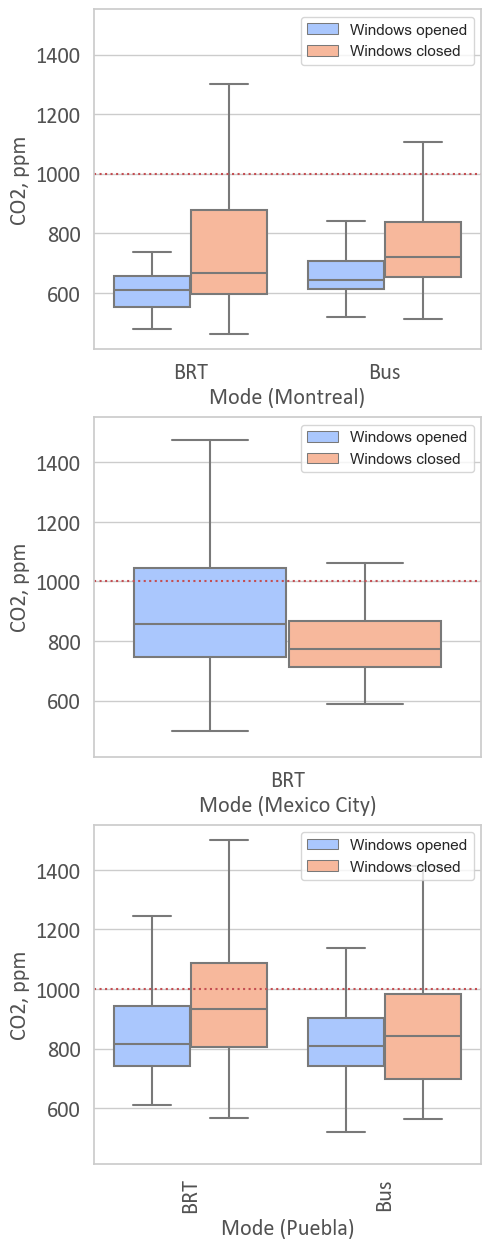

In [102]:
bp = sns.set(style='whitegrid')
facecolor = 'white'
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(5, 15), facecolor=facecolor, sharey=True)

order = df1.groupby('mode2')['co2'].median().sort_values().index

sns.boxplot(x='mode2', y='co2', data=df1[(df1.city=='Montreal')], hue='wo', hue_order=['Windows opened', 'Windows closed'], showfliers=False, #showfliers turns on and off the outliers ticks
           #medianprops={"color":"coral"},
           palette='coolwarm',
           order=['BRT', 'Bus'],
           saturation=5,
           ax=ax1)
font_color = '#525252'
csfont = {'fontname':'Calibri'}
hfont = {'fontname':'Calibri'}

ax1.set_ylabel('CO2, ppm', fontsize=16, color=font_color, **hfont)
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
    
ax1.set_xlabel('Mode (Montreal)', fontsize=16, color=font_color, **hfont)
plt.xticks(rotation=90)
ax1.legend(loc='upper right')
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
ax1.axhline(y=1000, color='r', ls=':')

sns.boxplot(x='mode2', y='co2', data=df1[(df1.city=='Mexico City')], hue='wo', showfliers=False, #showfliers turns on and off the outliers ticks
           #medianprops={"color":"coral"},
           palette='coolwarm',
           order=['BRT'],
           saturation=5,
           ax=ax2)
font_color = '#525252'
csfont = {'fontname':'Calibri'}
hfont = {'fontname':'Calibri'}

ax2.set_ylabel('CO2, ppm', fontsize=16, color=font_color, **hfont)
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
    
ax2.set_xlabel('Mode (Mexico City)', fontsize=16, color=font_color, **hfont)
plt.xticks(rotation=90)
ax2.legend(loc='upper right')
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
ax2.axhline(y=1000, color='r', ls=':')
    
sns.boxplot(x='mode2', y='co2', data=df1[(df1.city=='Puebla')], hue='wo', showfliers=False, #showfliers turns on and off the outliers ticks
           #medianprops={"color":"coral"},
           palette='coolwarm',
           order=['BRT', 'Bus'],
           saturation=5,
           ax=ax3)
font_color = '#525252'
csfont = {'fontname':'Calibri'}
hfont = {'fontname':'Calibri'}

#plt.ylim([0, 100])
ax3.set_ylabel('CO2, ppm', fontsize=16, color=font_color, **hfont)
for label in (ax3.get_xticklabels() + ax3.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
    
ax3.set_xlabel('Mode (Puebla)', fontsize=16, color=font_color, **hfont)
plt.xticks(rotation=90)
ax3.legend(loc='upper right')
for label in (ax3.get_xticklabels() + ax3.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
ax3.axhline(y=1000, color='r', ls=':')
    
    #title = 'CO2 concentrations, by transit mode and air exechange status'
#fig.suptitle(title, y=.90, fontsize=16, color=font_color, **csfont)

filename = 'pet_veh_boxplot'
plt.savefig(filename+'.png', facecolor=facecolor)

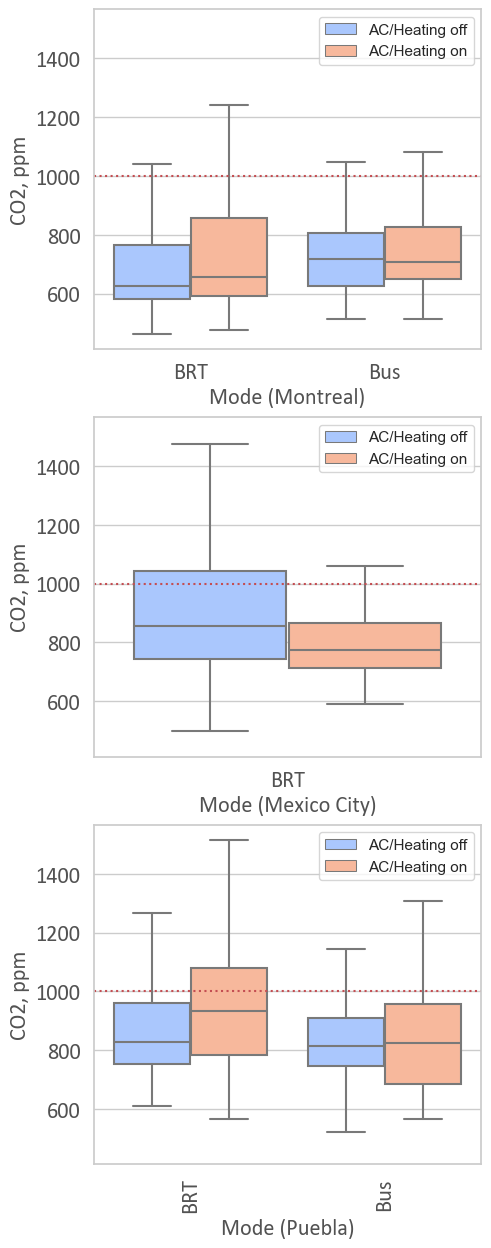

In [103]:
bp = sns.set(style='whitegrid')
facecolor = 'white'
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(5, 15), facecolor=facecolor, sharey=True)


sns.boxplot(x='mode2', y='co2', data=df1[(df1.city=='Montreal')], hue='ac', hue_order=['AC/Heating off', 'AC/Heating on'], showfliers=False, #showfliers turns on and off the outliers ticks
           #medianprops={"color":"coral"},
           palette='coolwarm',
           order=['BRT', 'Bus'],
           saturation=5,
           ax=ax1)
font_color = '#525252'
csfont = {'fontname':'Calibri'}
hfont = {'fontname':'Calibri'}

ax1.set_ylabel('CO2, ppm', fontsize=16, color=font_color, **hfont)
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
    
ax1.set_xlabel('Mode (Montreal)', fontsize=16, color=font_color, **hfont)
plt.xticks(rotation=90)
ax1.legend(loc='upper right')
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
ax1.axhline(y=1000, color='r', ls=':')

sns.boxplot(x='mode2', y='co2', data=df1[(df1.city=='Mexico City')], hue='ac', showfliers=False, #showfliers turns on and off the outliers ticks
           #medianprops={"color":"coral"},
           palette='coolwarm',
           order=['BRT'],
           saturation=5,
           ax=ax2)
font_color = '#525252'
csfont = {'fontname':'Calibri'}
hfont = {'fontname':'Calibri'}

ax2.set_ylabel('CO2, ppm', fontsize=16, color=font_color, **hfont)
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
    
ax2.set_xlabel('Mode (Mexico City)', fontsize=16, color=font_color, **hfont)
plt.xticks(rotation=90)
ax2.legend(loc='upper right')
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
ax2.axhline(y=1000, color='r', ls=':')
    
sns.boxplot(x='mode2', y='co2', data=df1[(df1.city=='Puebla')], hue='ac', showfliers=False, #showfliers turns on and off the outliers ticks
           #medianprops={"color":"coral"},
           palette='coolwarm',
           order=['BRT', 'Bus'],
           saturation=5,
           ax=ax3)
font_color = '#525252'
csfont = {'fontname':'Calibri'}
hfont = {'fontname':'Calibri'}

#plt.ylim([0, 100])
ax3.set_ylabel('CO2, ppm', fontsize=16, color=font_color, **hfont)
for label in (ax3.get_xticklabels() + ax3.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
    
ax3.set_xlabel('Mode (Puebla)', fontsize=16, color=font_color, **hfont)
plt.xticks(rotation=90)
ax3.legend(loc='upper right')
for label in (ax3.get_xticklabels() + ax3.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
ax3.axhline(y=1000, color='r', ls=':')
    
    #title = 'CO2 concentrations, by transit mode and air exechange status'
#fig.suptitle(title, y=.90, fontsize=16, color=font_color, **csfont)

filename = 'pet_veh_boxplot'
plt.savefig(filename+'.png', facecolor=facecolor)

AttributeError: 'AxesSubplot' object has no attribute 'refline'

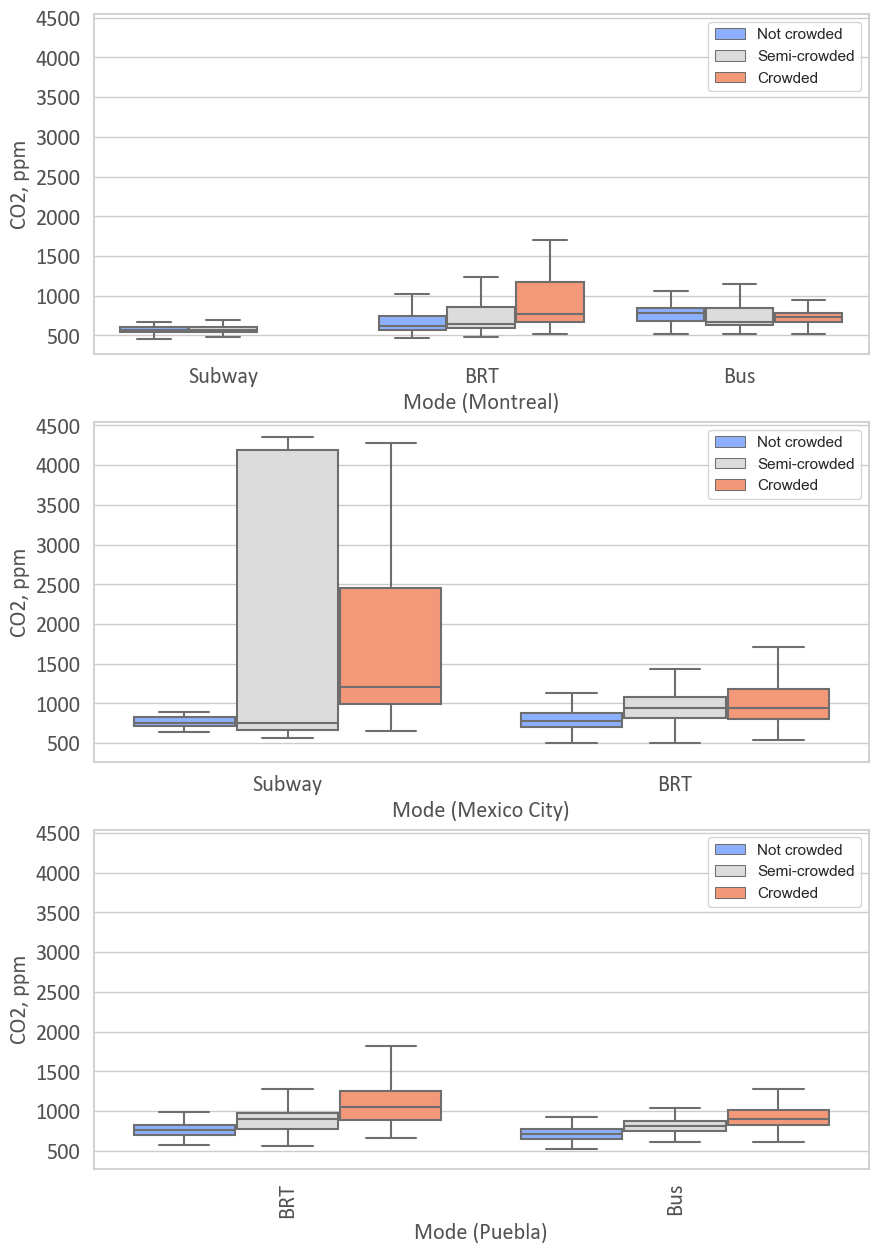

In [99]:
bp = sns.set(style='whitegrid')
facecolor = 'white'
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 15), facecolor=facecolor, sharey=True)

sns.boxplot(x='mode2', y='co2', data=df1[(df1.city=='Montreal')], order=['Subway', 'BRT', 'Bus'], hue='crowd', hue_order=['Not crowded', 'Semi-crowded', 'Crowded'], showfliers=False, #showfliers turns on and off the outliers ticks
           #medianprops={"color":"coral"},
           palette='coolwarm',
           saturation=5,
           ax=ax1)
font_color = '#525252'
csfont = {'fontname':'Calibri'}
hfont = {'fontname':'Calibri'}

ax1.set_ylabel('CO2, ppm', fontsize=16, color=font_color, **hfont)
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
    
ax1.set_xlabel('Mode (Montreal)', fontsize=16, color=font_color, **hfont)
plt.xticks(rotation=90)
ax1.legend(loc='upper right')
#ax1.set_ylim(400, 2000)
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
    


sns.boxplot(x='mode2', y='co2', data=df1[(df1.city=='Mexico City')], hue='crowd', hue_order=['Not crowded', 'Semi-crowded', 'Crowded'], showfliers=False, #showfliers turns on and off the outliers ticks
           #medianprops={"color":"coral"},
           palette='coolwarm',
           order=['Subway', 'BRT'],
           saturation=5,
           ax=ax2)
font_color = '#525252'
csfont = {'fontname':'Calibri'}
hfont = {'fontname':'Calibri'}

ax2.set_ylabel('CO2, ppm', fontsize=16, color=font_color, **hfont)
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
    
ax2.set_xlabel('Mode (Mexico City)', fontsize=16, color=font_color, **hfont)
plt.xticks(rotation=90)
#ax2.set_ylim(400, 4500)
ax2.legend(loc='upper right')
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
    

    
g=sns.boxplot(x='mode2', y='co2', data=df1[(df1.city=='Puebla')], hue='crowd', hue_order=['Not crowded', 'Semi-crowded', 'Crowded'], showfliers=False, #showfliers turns on and off the outliers ticks
           #medianprops={"color":"coral"},
           palette='coolwarm',
           order=['BRT', 'Bus'],
           saturation=5,
           ax=ax3)
font_color = '#525252'
csfont = {'fontname':'Calibri'}
hfont = {'fontname':'Calibri'}

ax3.set_ylabel('CO2, ppm', fontsize=16, color=font_color, **hfont)
ax3.legend(loc='upper right')
for label in (ax3.get_xticklabels() + ax3.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
    
ax3.set_xlabel('Mode (Puebla)', fontsize=16, color=font_color, **hfont)
plt.xticks(rotation=90)
#ax3.set_ylim(400, 2000)
for label in (ax3.get_xticklabels() + ax3.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)
    
    
    #title = 'CO2 concentrations, by transit mode and crowdedness level'
#fig.suptitle(title, y=.90, fontsize=16, color=font_color, **csfont)

filename = 'pet_veh_boxplot'
plt.savefig(filename+'.png', facecolor=facecolor)